In [96]:
from pandas import read_excel
import pandas as pd
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r

#### 문제1
아래의 데이터는 콩의 함유량에 따른 강도를 조사한 데이터이다.

분석하여라.

In [6]:
df =read_excel("https://data.hossam.kr/E04/beans.xlsx")

df

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


In [8]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

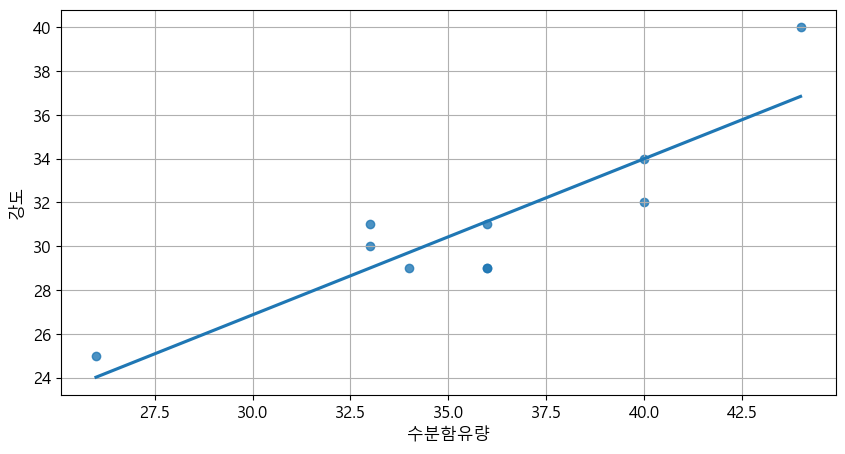

In [10]:
plt.rcParams['figure.figsize'] = (10, 5)
sb.regplot(data=df, x= '수분함유량', y ='강도', ci = False)
plt.grid()
plt.show()
plt.close()

두 통계적 분석 방법을 통하여 수분함유량이 높을 수록

In [11]:
pearson_r(df)

,statistic,pvalue,result
fields,,,
수분함유량 vs 강도,0.888052,0.000599,True
강도 vs 수분함유량,0.888052,0.000599,True


In [106]:
model1 =ols('강도~수분함유량', data = df)
fit1 = model1.fit()

In [107]:
fit1.summary()

C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           0.000599
Time:                        09:55:20   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.276      -5.355      16.353
수분함유량          0.7123      0.130      5.463      0.001       0.412       1.013
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.530
Skew:                           0.264   Prob(JB):                        0.767
Kurtosis:                       2.004   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

리스트 형식으로 결과 출력 가능

In [118]:
tbl = fit1.summary()
items = tbl.tables[0].data
items

C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[['Dep. Variable:', '강도', '  R-squared:         ', '   0.789'],
 ['Model:', 'OLS', '  Adj. R-squared:    ', '   0.762'],
 ['Method:', 'Least Squares', '  F-statistic:       ', '   29.85'],
 ['Date:', 'Tue, 25 Jul 2023', '  Prob (F-statistic):', '0.000599'],
 ['Time:', '12:05:42', '  Log-Likelihood:    ', ' -19.614'],
 ['No. Observations:', '    10', '  AIC:               ', '   43.23'],
 ['Df Residuals:', '     8', '  BIC:               ', '   43.83'],
 ['Df Model:', '     1', '                     ', ' '],
 ['Covariance Type:', 'nonrobust', '                     ', ' ']]

In [116]:
my = {}
for item in items:
    n = len(item)

    for i in range(0,n,2):
        print(item[i], ">>",print (item[i+1]))

강도
Dep. Variable: >> None
   0.789
  R-squared:          >> None
OLS
Model: >> None
   0.762
  Adj. R-squared:     >> None
Least Squares
Method: >> None
   29.85
  F-statistic:        >> None
Tue, 25 Jul 2023
Date: >> None
0.000599
  Prob (F-statistic): >> None
09:57:04
Time: >> None
 -19.614
  Log-Likelihood:     >> None
    10
No. Observations: >> None
   43.23
  AIC:                >> None
     8
Df Residuals: >> None
   43.83
  BIC:                >> None
     1
Df Model: >> None
 
                      >> None
nonrobust
Covariance Type: >> None
 
                      >> None


#### 문제 2
아래의 데이터는 10년간 에어컨의 예약대수에 따른 실 판매대수를 조사한 가상의 데이터이다.



In [13]:
df2 = read_excel("https://data.hossam.kr/E04/aircon.xlsx")  
df2


,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50
5,38,69
6,39,70
7,46,64
8,49,89
9,58,98



요구사항
1. 위 데이터를 분석하고 결과를 보고하시오.
2. 기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.

In [15]:
model2 = ols("판매대수 ~ 예약대수", data =df2)


In [19]:
fit = model2.fit()
fit.summary()

C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   판매대수   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           3.26e-05
Time:                        17:08:22   Log-Likelihood:                -32.667
No. Observations:                  10   AIC:                             69.33
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0689      7.113      0.713      0.496     -11.333      21.471
예약대수           1.5751      0.189      8.331      0.000       1.139       2.011
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   2.910
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.497
Skew:                          -0.541   Prob(JB):                        0.780
Kurtosis:                       2.849   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$판매대수 = 5.0690+1.5751 \times 예약대수$

In [18]:
판매대수 = 1.5751 *150 + 5.0690
판매대수

241.33399999999997

In [23]:
fit.predict({"예약대수": [100,150,200,300,400,500]}) # 요인과 값을 리스트로 입력하면 된다.

0    162.579007
1    241.334067
2    320.089127
3    477.599247
4    635.109367
5    792.619487
dtype: float64

약 241대가 판매되었을 것을 예상할 수 있다.

#### 문제 3
아래의 데이터는 부모의 키에 따른 자식의 키를 조사한 데이터이다.

In [68]:
df3 = read_excel("https://data.hossam.kr/E04/galton.xlsx")
# child = df3['child'].unique()
# child = df3['child']
# child
df3

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


In [102]:
df4 =df3.groupby('child')
print(df4.groups)
# child = pd.unique(df3['child'])
# for j in 
# for i in df4.groups[]

{61.7: [0, 1, 2, 3, 4], 62.2: [5, 6, 7, 8, 9, 10, 11], 63.2: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], 64.2: [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102], 65.2: [103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], 66.2: [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 21

In [29]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

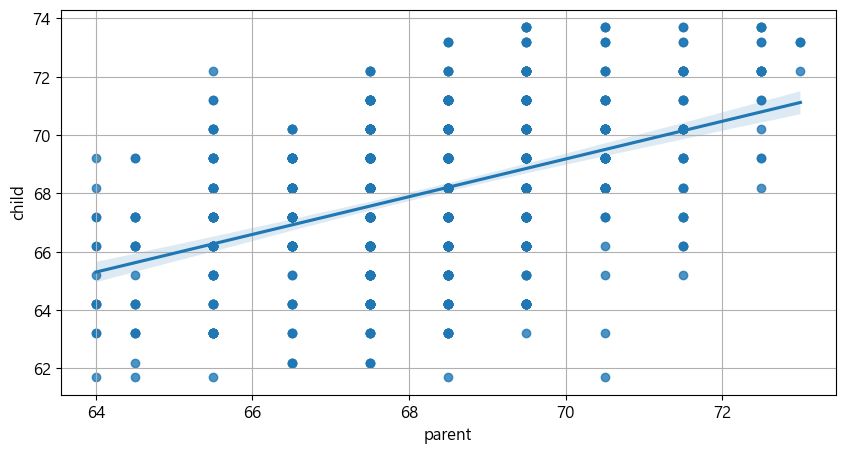

In [30]:
plt.rcParams['figure.figsize'] = (10, 5)
sb.regplot(data=df3, x= 'parent', y ='child')
plt.grid()
plt.show()
plt.close()

In [28]:
model = ols("child ~ parent", data = df3)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.73e-49
Time:                        17:11:42   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9415      2.811      8.517      0.000      18.425      29.458
parent         0.6463      0.041     15.711      0.000       0.566       0.727
==============================================================================
Omnibus:                       11.057   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.944
Skew:                          -0.241   Prob(JB):                      0.00420
Kurtosis:                       2.775   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$child_{height} = 23.9415+ 0.6463 \times parent_{height}$ 

그러나 R